## 온라인 학습활동 과제 15 ( Linear Regression 응용)

### 20175327 이연희

- 데이터 셋  

    - https://www.kaggle.com/farhanmd29/50-startups  
    
    
- Kernels
    - https://www.kaggle.com/martandsay/50-startups-multi-regression-visualization

In [1]:
import pandas as pd             
import numpy as np               
import matplotlib.pyplot as plt  
%matplotlib inline 
import seaborn as sns            
import warnings             
warnings.filterwarnings('ignore')

### 데이터 분석

In [2]:
# CSV 파일 열기
car_details = pd.read_csv('CarPrice_Assignment.csv')

# 상위 5개 가져오기
car_details.head()

# 데이터 구조 
display(car_details.shape)

# 통계요약
display(car_details.describe())

# 데이터 정보
display(car_details.info())

(205, 26)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

None

### 데이터 클리닝 및 준비

In [3]:
# CarName 변수에서 companyname 분할
companyname = car_details['CarName'].apply(lambda name : name.split(' ')[0])

# CarName 변수 drop
car_details.drop(columns = {'CarName'}, axis = 1, inplace = True)

# companyname 새 변수로 추가
car_details.insert(loc = 3, column = 'companyname', value = companyname)

# 상위 5개 값 가져오기
car_details.head()

,car_ID,symboling,fueltype,companyname,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# companyname 변수의 고유 값 확인
car_details['companyname'].unique()

# 데이터를 소문자로 변환
car_details['companyname'] = car_details['companyname'].str.lower()

# 철자 오류의 이름을 바꾸는 함수 정의
def renameCompanyName(error_data, correct_data):
    car_details['companyname'].replace(error_data, correct_data, inplace = True)

# call namecompanyName 함수 
renameCompanyName('vw','volkswagen')
renameCompanyName('vokswagen','volkswagen')
renameCompanyName('maxda','mazda')
renameCompanyName('porcshce','porsche')
renameCompanyName('toyouta','toyota')

# companyname 변수의 고유 값 확인
car_details['companyname'].unique()

# car_details dataframe에서 중복 값 확인
car_details.loc[car_details.duplicated()]

,car_ID,symboling,fueltype,companyname,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


### 데이터 시각화

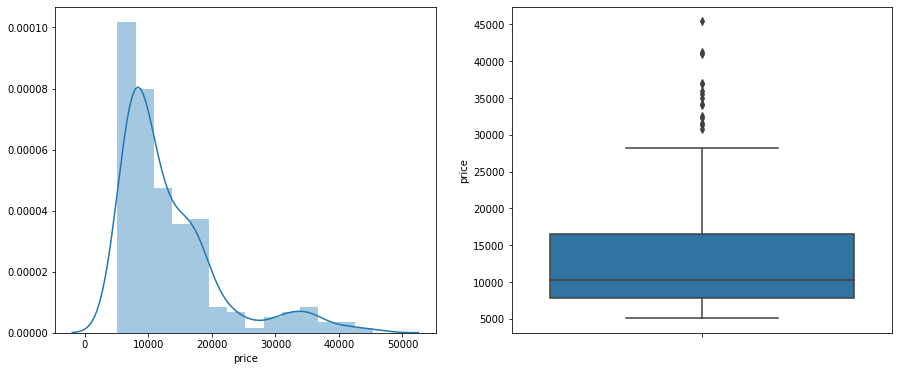

In [5]:
# 자동차 가격 시각화
plt.figure(figsize=(15,6)) # Set width and height for the plots

plt.subplot(1,2,1) # Set the rows, columns and their indexing position
sns.distplot(a = car_details.price)

plt.subplot(1,2,2) # Set the rows, columns and their indexing position
sns.boxplot(y = car_details.price)

In [6]:
# 자동차 가격 통계요약
car_details.price.describe(percentiles = [0.25, 0.5, 0.75, 0.85, 0.95, 1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
95%      32472.400000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

[Text(0, 0.5, 'Frequency of fuel type'), Text(0.5, 0, 'Fuel Type')]

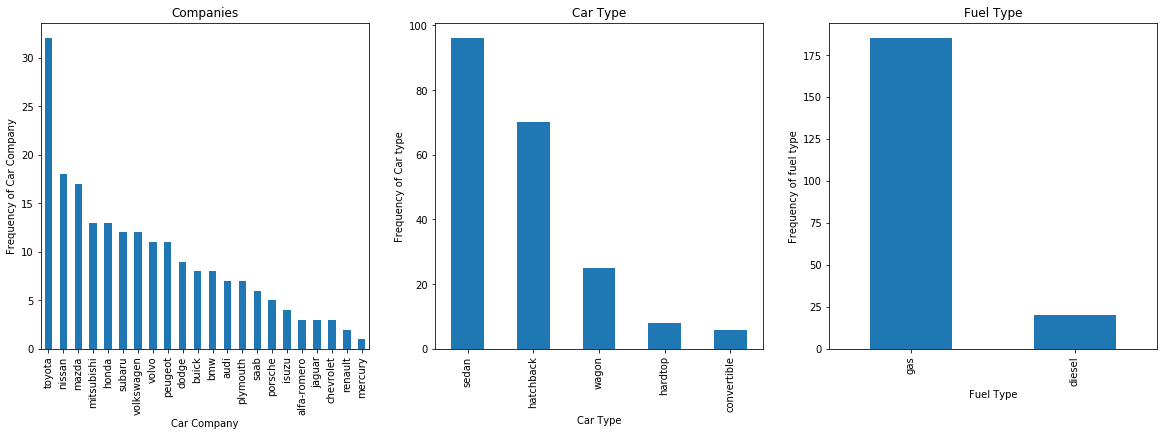

In [7]:
# 자동차 회사, 유형, 연료유형 시각화
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
plt1 = car_details.companyname.value_counts().plot('bar')
plt.title('Companies')
plt1.set(xlabel = 'Car Company', ylabel='Frequency of Car Company')

plt.subplot(1,3,2)
plt1 = car_details.carbody.value_counts().plot('bar')
plt.title('Car Type')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.subplot(1,3,3)
plt1 = car_details.fueltype.value_counts().plot('bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

[Text(0, 0.5, 'Frequency of Engine Type'), Text(0.5, 0, 'Engine Type')]

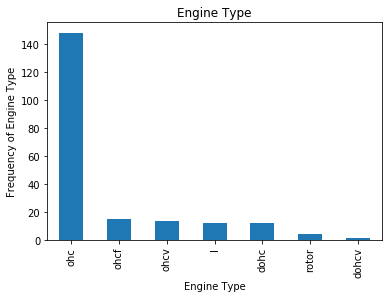

In [8]:
# 엔진 유형 설정 시각화
plt1 = car_details.enginetype.value_counts().plot('bar')
plt.title('Engine Type')
plt1.set(xlabel = 'Engine Type', ylabel='Frequency of Engine Type')

[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'Fuel Type')]

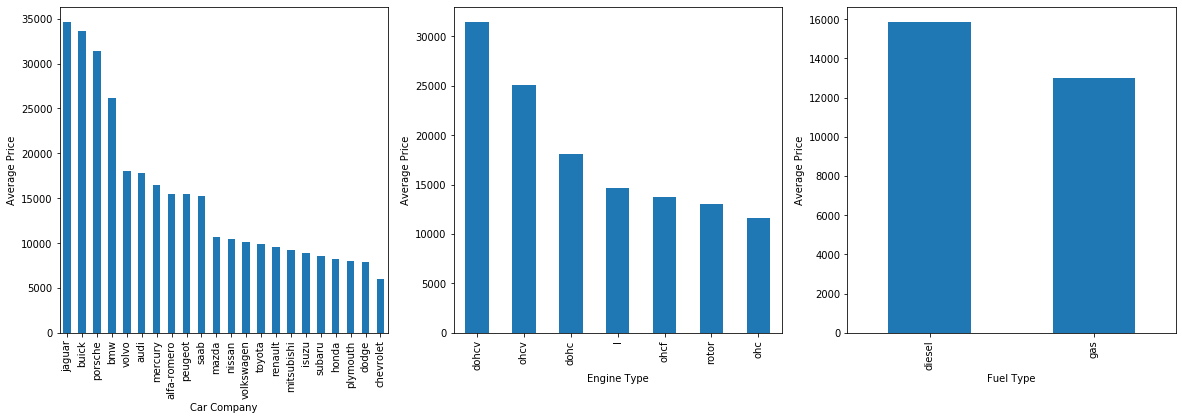

In [9]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt1 = car_details.groupby('companyname')['price'].mean().sort_values(ascending = False).plot('bar')
plt1.set(xlabel = 'Car Company', ylabel = 'Average Price')

plt.subplot(1,3,2)
plt1 = car_details.groupby('enginetype')['price'].mean().sort_values(ascending = False).plot('bar')
plt1.set(xlabel = 'Engine Type', ylabel = 'Average Price')

plt.subplot(1,3,3)
plt1 = car_details.groupby('fueltype')['price'].mean().sort_values(ascending = False).plot('bar')
plt1.set(xlabel = 'Fuel Type', ylabel = 'Average Price')

[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'Engine Location')]

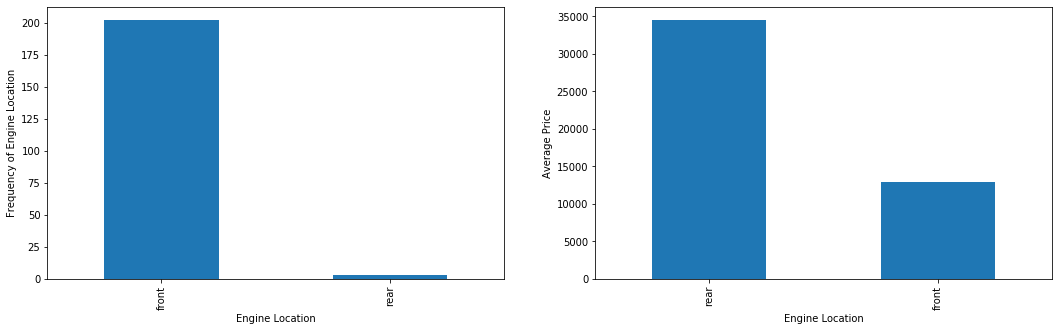

In [10]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt1 = car_details.enginelocation.value_counts().sort_values(ascending = False).plot('bar')
plt1.set(xlabel = 'Engine Location', ylabel = 'Frequency of Engine Location')

plt.subplot(1,2,2)
plt1 = car_details.groupby('enginelocation')['price'].mean().sort_values(ascending = False).plot('bar')
plt1.set(xlabel = 'Engine Location', ylabel = 'Average Price')

### 특징 추출

Text(0, 0.5, 'Price')

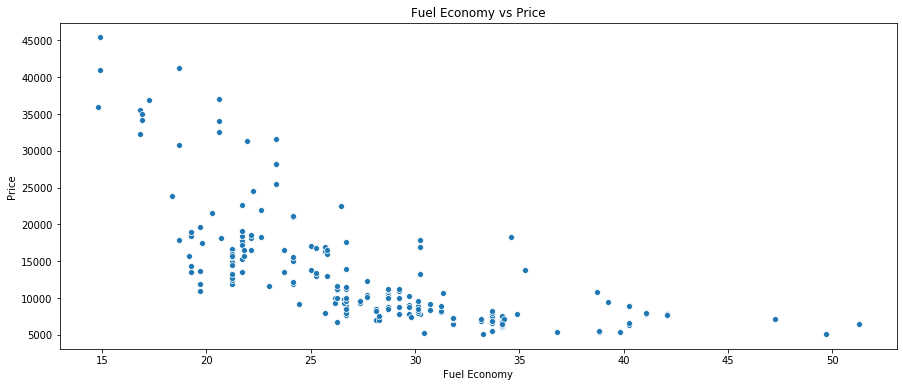

In [11]:
# highwaympg와 citympg를 이용한 연비 산정
car_details['fueleconomy'] = (0.45 * car_details['highwaympg']) + (0.55 * car_details['citympg'])

# boreratio와 stroke를 사용하여 비율 계산
car_details['strokeratio'] = car_details['boreratio'] / car_details['stroke']

# 평균 자동차 가격을 기준으로 자동차 회사 분류
car_details['price'] = car_details['price'].astype('int')
temp1 = car_details.copy()
temp2 = temp1.groupby('companyname')['price'].mean()
temp1 = temp1.merge(temp2.reset_index(), how = 'left', on = 'companyname')
bins = [0, 10000, 20000, 40000]
cars_bins = ['Low', 'Medium', 'High']
car_details['carsrange'] = pd.cut(temp1['price_y'], bins, right = False, labels = cars_bins)

plt.figure(figsize = (15,6))
plt.title('Fuel Economy vs Price')
sns.scatterplot(x = car_details['fueleconomy'], y = car_details['price'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

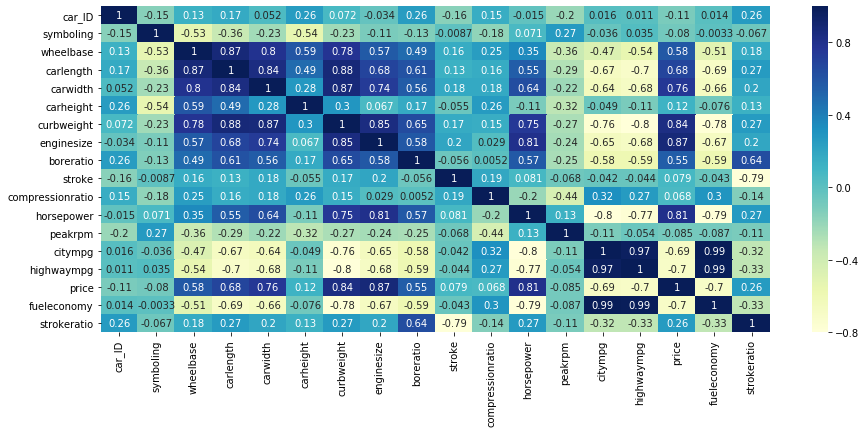

In [12]:
plt.figure(figsize=(15,6))
sns.heatmap(car_details.corr(), annot = True, cmap='YlGnBu')

### 더미 변수로 변환

In [13]:
categorical_variables = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                       'enginetype', 'cylindernumber', 'fuelsystem', 'carsrange']

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df= pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
  
for variable in categorical_variables:
    car_details = dummies(variable, car_details)
    
display(car_details.shape)
display(car_details.head())

(205, 54)

,car_ID,companyname,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
0,1,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,1,0
1,2,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,1,0
2,3,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,1,0,0,1,0
3,4,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,1,0,0,1,0
4,5,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,1,0,0,1,0


In [14]:
# 모델 구축시 필요없는 특징 제거
car_details.drop(columns =['car_ID','companyname'], inplace = True)

car_details.shape

(205, 52)

### Test & Train 데이터 분할 / 특징 스케일링

In [15]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(car_details, train_size = 0.7, test_size = 0.3, random_state = 100)

# MinMaxScaler를 사용하여 스케일링 적용
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
            'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueleconomy', 'strokeratio', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

display(df_train.describe())
display(df_train.head())

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.412587,0.118881
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,1,0,0,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,0,0,0,0,1,0,0,0,1
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,0,0,0,0,1,0,0,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,0,0,0,0,1,0,0,1,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,0,0,0,0,1,0,0,1,0


In [16]:
# 데이터를 X 및 Y 변수로 분할
y_train = df_train.pop('price')
X_train = df_train

### 모델 구축

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 4),
 ('carlength', False, 30),
 ('carwidth', True, 1),
 ('carheight', False, 24),
 ('curbweight', True, 1),
 ('enginesize', False, 9),
 ('boreratio', False, 7),
 ('stroke', False, 8),
 ('compressionratio', False, 37),
 ('horsepower', True, 1),
 ('peakrpm', False, 12),
 ('citympg', False, 39),
 ('highwaympg', False, 27),
 ('fueleconomy', False, 5),
 ('strokeratio', False, 16),
 (-1, False, 21),
 (0, False, 20),
 (1, False, 19),
 (2, False, 18),
 (3, False, 22),
 ('gas', False, 31),
 ('turbo', False, 26),
 ('two', False, 40),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', False, 2),
 ('wagon', True, 1),
 ('fwd', False, 28),
 ('rwd', False, 38),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', False, 29),
 ('ohc', False, 11),
 ('ohcf', False, 14),
 ('ohcv', False, 17),
 ('rotor', False, 6),
 ('five', False, 36),
 ('four', False, 15),
 ('six', False, 32),
 ('three', True, 1),
 ('twelve', False, 3),
 ('two', False, 10),
 ('2bbl', False, 33),
 ('4bbl', False,

In [19]:
X_train.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'horsepower', 'hardtop', 'hatchback', 'wagon',
       'rear', 'dohcv', 'three', 'High'],
      dtype='object')

In [20]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,carwidth,curbweight,horsepower,hardtop,hatchback,wagon,rear,dohcv,three,High
122,0.291667,0.272692,0.083333,0,0,0,0,0,0,0
125,0.666667,0.500388,0.395833,0,1,0,0,0,0,1
166,0.308333,0.314973,0.266667,0,1,0,0,0,0,0
1,0.316667,0.411171,0.262500,0,0,0,0,0,0,0
199,0.575000,0.647401,0.475000,0,0,1,0,0,0,0


In [21]:
def buildModel(X,y):
    X = sm.add_constant(X) 
    lm = sm.OLS(y,X).fit()
    print(lm.summary()) 
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### 모델 1

In [22]:
X_train_new = buildModel(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.3
Date:                Tue, 12 May 2020   Prob (F-statistic):           1.21e-70
Time:                        17:57:52   Log-Likelihood:                 205.92
No. Observations:                 143   AIC:                            -389.8
Df Residuals:                     132   BIC:                            -357.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1028      0.017     -5.968      0.0

In [23]:
X_train_new = X_train_new.drop(['hardtop'], axis = 1)

### 모델 2

In [24]:
X_train_new = buildModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     192.7
Date:                Tue, 12 May 2020   Prob (F-statistic):           9.14e-72
Time:                        17:57:52   Log-Likelihood:                 205.83
No. Observations:                 143   AIC:                            -391.7
Df Residuals:                     133   BIC:                            -362.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1039      0.017     -6.112      0.0

In [25]:
vif_df = X_train_new.drop(['const'], axis = 1)
checkVIF(vif_df)

,Features,VIF
1,curbweight,39.51
0,carwidth,24.96
2,horsepower,11.50
8,High,1.87
3,hatchback,1.63
6,dohcv,1.47
4,wagon,1.41
5,rear,1.20
7,three,1.03


In [26]:
X_train_new = X_train_new.drop(['curbweight'], axis = 1)

### 모델 3

In [27]:
X_train_new = buildModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     189.4
Date:                Tue, 12 May 2020   Prob (F-statistic):           3.87e-69
Time:                        17:57:52   Log-Likelihood:                 196.43
No. Observations:                 143   AIC:                            -374.9
Df Residuals:                     134   BIC:                            -348.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1082      0.018     -5.993      0.0

In [28]:
X_train_new = X_train_new.drop(['wagon'], axis = 1)

### 모델 4

In [29]:
X_train_new = buildModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     216.3
Date:                Tue, 12 May 2020   Prob (F-statistic):           4.22e-70
Time:                        17:57:52   Log-Likelihood:                 195.88
No. Observations:                 143   AIC:                            -375.8
Df Residuals:                     135   BIC:                            -352.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1117      0.018     -6.308      0.0

In [30]:
vif_df = X_train_new.drop(['const'], axis = 1)
checkVIF(vif_df)

,Features,VIF
1,horsepower,7.51
0,carwidth,6.29
6,High,1.70
2,hatchback,1.45
4,dohcv,1.20
3,rear,1.17
5,three,1.03


In [31]:
X_train_new = X_train_new.drop(['horsepower'], axis = 1)

### 모델 5

In [32]:
X_train_new = buildModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     150.5
Date:                Tue, 12 May 2020   Prob (F-statistic):           1.63e-57
Time:                        17:57:52   Log-Likelihood:                 162.34
No. Observations:                 143   AIC:                            -310.7
Df Residuals:                     136   BIC:                            -289.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1306      0.022     -5.894      0.0

In [33]:
X_train_new = X_train_new.drop(['hatchback'], axis = 1)

### 모델 6

In [34]:
X_train_new = buildModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     180.6
Date:                Tue, 12 May 2020   Prob (F-statistic):           1.80e-58
Time:                        17:57:52   Log-Likelihood:                 161.87
No. Observations:                 143   AIC:                            -311.7
Df Residuals:                     137   BIC:                            -294.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1390      0.020     -6.843      0.0

In [35]:
X_train_new = X_train_new.drop(['three'], axis = 1)

### 모델 7

In [36]:
X_train_new = buildModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     221.9
Date:                Tue, 12 May 2020   Prob (F-statistic):           4.71e-59
Time:                        17:57:52   Log-Likelihood:                 160.37
No. Observations:                 143   AIC:                            -310.7
Df Residuals:                     138   BIC:                            -295.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1304      0.020     -6.583      0.0

In [37]:
X_train_new = X_train_new.drop(['dohcv'], axis = 1)

### 모델 8

In [38]:
X_train_new = buildModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     291.3
Date:                Tue, 12 May 2020   Prob (F-statistic):           9.90e-60
Time:                        17:57:52   Log-Likelihood:                 158.96
No. Observations:                 143   AIC:                            -309.9
Df Residuals:                     139   BIC:                            -298.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1259      0.020     -6.375      0.0

In [39]:
vif_df = X_train_new.drop(['const'], axis = 1)
checkVIF(vif_df)

,Features,VIF
2,High,1.40
0,carwidth,1.33
1,rear,1.07


### 모델 분석

Text(0.5, 0, 'Errors')

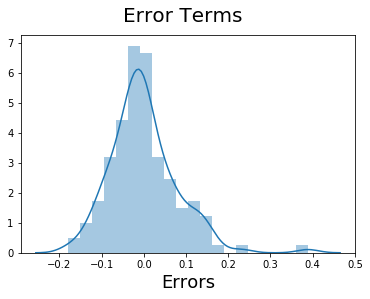

In [40]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

### 모델 예측 및 평가

In [41]:
# Scaling the test data
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
            'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueleconomy', 'strokeratio', 'price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)


In [42]:
# test 데이터 평가
from sklearn.metrics import r2_score 

r2_score(y_test, y_pred)

0.8335910335897068

In [43]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     291.3
Date:                Tue, 12 May 2020   Prob (F-statistic):           9.90e-60
Time:                        17:57:54   Log-Likelihood:                 158.96
No. Observations:                 143   AIC:                            -309.9
Df Residuals:                     139   BIC:                            -298.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1259      0.020     -6.375      0.0

Text(0, 0.5, 'y_pred')

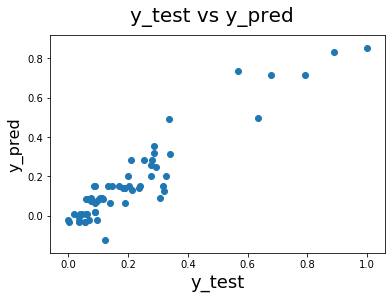

In [44]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  